In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import dill
import pickle

from niapy.algorithms.algorithm import Algorithm
from niapy.util import levy_flight
from niapy.algorithms.basic import CuckooSearch

from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from niapy.task import Task
from niapy.algorithms.basic import CuckooSearch
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

import logging

from niapy.problems import Problem
from niapy.task import Task


import time
from sklearn import datasets

In [3]:
df_train = pd.read_csv('trainsample_ROS2class.csv')
df_test = pd.read_csv('data_test.csv')

In [4]:

X_train = df_train.drop('label', axis=1)
y_train = df_train['label']


X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

In [5]:
feature_names = X_train.columns.values

In [6]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [7]:
X_train

array([[12.51414692, 13.73737411, 15.30228192, ..., 10.33516701,
        16.63957106, 16.23505499],
       [11.25307926, 12.33511117, 14.24391032, ...,  8.87651695,
        15.01718249, 14.57031824],
       [11.66906221, 12.20795994, 15.09771531, ...,  9.62735148,
        16.89559658, 16.46998992],
       ...,
       [11.97333862, 12.60119044, 15.37174262, ...,  8.79181407,
        16.87014313, 16.5983477 ],
       [11.46964182, 11.75918081, 14.44468492, ...,  8.42584531,
        15.0542609 , 14.26674263],
       [12.74546425, 13.62749969, 15.84184441, ...,  9.40875431,
        16.6441816 , 16.4650753 ]])

In [8]:
y_train

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
class SVMRbfFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.8):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.fitness_curve = []
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(kernel="rbf",), self.X_train[:, selected], self.y_train, cv=10, n_jobs=-1, scoring="accuracy").mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        self.fitness_curve.append(self.alpha * score + (1 - self.alpha) * (num_selected / num_features))
        
        return (self.alpha * score) + (1 - self.alpha) * (num_selected / num_features)


In [10]:
problem = SVMRbfFeatureSelection(X_train, y_train)
# max_iters = 100
task = Task(problem, max_iters = 10)
algorithm = CuckooSearch(population_size=10, seed=1234)
best_features, best_fitness = algorithm.run(task)

In [11]:
selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())
print('Selected features:', ', '.join(feature_names[selected_features].tolist()))

Number of selected features: 72
Selected features: 200001_at, 200005_at, 200006_at, 200009_at, 200010_at, 200012_x_at, 200013_at, 200014_s_at, 200015_s_at, 200017_at, 200018_at, 200019_s_at, 200022_at, 200027_at, 200033_at, 200037_s_at, 200038_s_at, 200039_s_at, 200040_at, 200041_s_at, 200042_at, 200044_at, 200047_s_at, 200048_s_at, 200049_at, 200051_at, 200057_s_at, 200058_s_at, 200059_s_at, 200060_s_at, 200063_s_at, 200065_s_at, 200066_at, 200067_x_at, 200073_s_at, 200075_s_at, 200076_s_at, 200077_s_at, 200084_at, 200086_s_at, 200087_s_at, 200092_s_at, 200093_s_at, 200094_s_at, 200096_s_at, 200097_s_at, 200098_s_at, AFFX-BioB-5_at, AFFX-BioC-3_at, AFFX-BioDn-5_at, AFFX-CreX-3_at, AFFX-DapX-3_at, AFFX-HUMGAPDH/M33197_M_at, AFFX-HUMISGF3A/M97935_3_at, AFFX-HUMISGF3A/M97935_MA_at, AFFX-HUMRGE/M10098_3_at, AFFX-HUMRGE/M10098_M_at, AFFX-LysX-M_at, AFFX-M27830_5_at, AFFX-M27830_M_at, AFFX-ThrX-5_at, AFFX-ThrX-M_at, AFFX-r2-Bs-dap-5_at, AFFX-r2-Bs-phe-M_at, AFFX-r2-Bs-thr-M_s_at, AFFX-r2-Ec

In [12]:
print(feature_names[selected_features].tolist())

['200001_at', '200005_at', '200006_at', '200009_at', '200010_at', '200012_x_at', '200013_at', '200014_s_at', '200015_s_at', '200017_at', '200018_at', '200019_s_at', '200022_at', '200027_at', '200033_at', '200037_s_at', '200038_s_at', '200039_s_at', '200040_at', '200041_s_at', '200042_at', '200044_at', '200047_s_at', '200048_s_at', '200049_at', '200051_at', '200057_s_at', '200058_s_at', '200059_s_at', '200060_s_at', '200063_s_at', '200065_s_at', '200066_at', '200067_x_at', '200073_s_at', '200075_s_at', '200076_s_at', '200077_s_at', '200084_at', '200086_s_at', '200087_s_at', '200092_s_at', '200093_s_at', '200094_s_at', '200096_s_at', '200097_s_at', '200098_s_at', 'AFFX-BioB-5_at', 'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-CreX-3_at', 'AFFX-DapX-3_at', 'AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMISGF3A/M97935_MA_at', 'AFFX-HUMRGE/M10098_3_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-LysX-M_at', 'AFFX-M27830_5_at', 'AFFX-M27830_M_at', 'AFFX-ThrX-5_at', 'AFFX-ThrX-M_at', '

In [13]:
pickle.dump(feature_names[selected_features].tolist(), open("selected_featuresROS2.pkl", 'wb'))

In [14]:
#Train Selected Features
model_selected = SVC()

model_selected.fit(X_train[:, selected_features], y_train)
score_select = cross_val_score(model_selected,X_train[:, selected_features], y_train, scoring="accuracy", cv=10, n_jobs=-1).mean()
print('Subset accuracy Best Feature > 0.5:',score_select )

print('Selected Features Accuracy:', model_selected.score(X_train[:, selected_features], y_train))

Subset accuracy Best Feature > 0.5: 0.673076923076923
Selected Features Accuracy: 0.6846153846153846


In [15]:
#Train All Features
model_all = SVC()

model_all.fit(X_train, y_train)
score_all = cross_val_score( model_all, X_train, y_train, scoring="accuracy", cv=10, n_jobs=-1).mean()
print('Subset accuracy all feature:',score_all )

print('All Features Accuracy:', model_all.score(X_train, y_train))

Subset accuracy all feature: 0.6384615384615385
All Features Accuracy: 0.676923076923077


In [16]:
task.convergence_data()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0.37761905, 0.37622711, 0.37335165, 0.37335165, 0.3671978 ,
        0.3671978 , 0.36620879, 0.34725275, 0.34725275, 0.34725275]))

In [17]:
convergence_data = task.convergence_data()
convergence_data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0.37761905, 0.37622711, 0.37335165, 0.37335165, 0.3671978 ,
        0.3671978 , 0.36620879, 0.34725275, 0.34725275, 0.34725275]))

In [18]:
pickle.dump(convergence_data, open("convergance_datarbfRROS2.pkl", 'wb'))

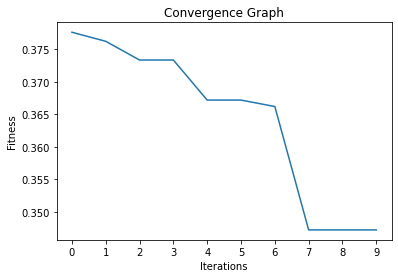

In [19]:
task.plot_convergence()

In [20]:
class SVMpolyFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.8):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.fitness_curve = []
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(kernel="poly",), self.X_train[:, selected], self.y_train, cv=10, n_jobs=-1, scoring="accuracy").mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        self.fitness_curve.append(self.alpha * score + (1 - self.alpha) * (num_selected / num_features))
        
        return (self.alpha * score) + (1 - self.alpha) * (num_selected / num_features)

In [21]:
problem_poly = SVMpolyFeatureSelection(X_train, y_train)
# max_iters = 100
task_poly = Task(problem_poly, max_iters = 10)
algorithm = CuckooSearch(population_size=10, seed=1234)
best_features_poly, best_fitness_poly = algorithm.run(task_poly)

In [22]:
selected_features_poly = best_features_poly > 0.5
print('Number of selected features:', selected_features_poly.sum())
print('Selected features:', ', '.join(feature_names[selected_features_poly].tolist()))

Number of selected features: 77
Selected features: 200000_s_at, 200005_at, 200006_at, 200008_s_at, 200012_x_at, 200013_at, 200014_s_at, 200015_s_at, 200017_at, 200019_s_at, 200020_at, 200021_at, 200023_s_at, 200024_at, 200030_s_at, 200032_s_at, 200034_s_at, 200035_at, 200038_s_at, 200039_s_at, 200040_at, 200041_s_at, 200042_at, 200043_at, 200044_at, 200046_at, 200047_s_at, 200048_s_at, 200050_at, 200053_at, 200055_at, 200058_s_at, 200059_s_at, 200064_at, 200065_s_at, 200068_s_at, 200070_at, 200072_s_at, 200078_s_at, 200081_s_at, 200083_at, 200084_at, 200085_s_at, 200086_s_at, 200088_x_at, 200090_at, 200093_s_at, 200098_s_at, 200099_s_at, AFFX-BioB-5_at, AFFX-BioB-M_at, AFFX-BioC-3_at, AFFX-CreX-3_at, AFFX-DapX-3_at, AFFX-DapX-M_at, AFFX-HSAC07/X00351_5_at, AFFX-HSAC07/X00351_M_at, AFFX-HUMGAPDH/M33197_3_at, AFFX-HUMGAPDH/M33197_5_at, AFFX-HUMISGF3A/M97935_5_at, AFFX-HUMISGF3A/M97935_MA_at, AFFX-HUMISGF3A/M97935_MB_at, AFFX-HUMRGE/M10098_5_at, AFFX-PheX-5_at, AFFX-ThrX-3_at, AFFX-ThrX-5

In [23]:
pickle.dump(feature_names[selected_features_poly].tolist(), open("selected_featurespolyROS2.pkl", 'wb'))

In [24]:
#Train Selected Features
model_selected_poly = SVC(kernel="poly")

model_selected_poly.fit(X_train[:, selected_features_poly], y_train)
score_selected_poly = cross_val_score(model_selected_poly,X_train[:, selected_features_poly], y_train, scoring="accuracy", cv=10, n_jobs=-1).mean()
print('Subset accuracy Best Feature > 0.5:',score_selected_poly )

print('Selected Features Accuracy:', model_selected_poly.score(X_train[:, selected_features_poly], y_train))

Subset accuracy Best Feature > 0.5: 0.9692307692307693
Selected Features Accuracy: 0.9846153846153847


In [25]:
#Train All Features
model_all_poly = SVC(kernel="poly")

model_all_poly.fit(X_train, y_train)
score_all_poly = cross_val_score( model_all_poly, X_train, y_train, scoring="accuracy", cv=10, n_jobs=-1).mean()
print('Subset accuracy all feature:',score_all_poly )

print('All Features Accuracy:', model_all_poly.score(X_train, y_train))

Subset accuracy all feature: 0.9192307692307693
All Features Accuracy: 0.9923076923076923


In [26]:
task_poly.convergence_data()
convergence_data_poly = task_poly.convergence_data()
convergence_data_poly


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0.13454212, 0.13454212, 0.13454212, 0.13355311, 0.12838828,
        0.12838828, 0.11628205, 0.11628205, 0.11628205, 0.11628205]))

In [27]:
pickle.dump(convergence_data_poly, open("convergance_datapolyROS2.pkl", 'wb'))

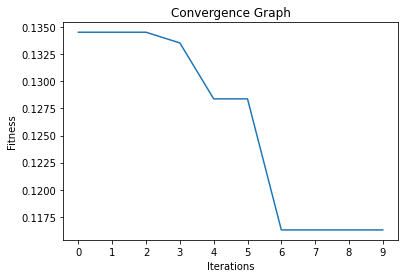

In [28]:
task_poly.plot_convergence()


In [29]:
class SVMlinearFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.8):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.fitness_curve = []
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(kernel="linear",), self.X_train[:, selected], self.y_train, cv=10, n_jobs=-1, scoring="accuracy").mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        self.fitness_curve.append(self.alpha * score + (1 - self.alpha) * (num_selected / num_features))
        
        return (self.alpha * score) + (1 - self.alpha) * (num_selected / num_features)

In [30]:
problem_linear = SVMlinearFeatureSelection(X_train, y_train)
# max_iters = 100
task_linear = Task(problem_linear, max_iters = 10)
algorithm = CuckooSearch(population_size=10, seed=1234)
best_features_linear, best_fitness_linear = algorithm.run(task_linear)

In [31]:
selected_features_linear = best_features_linear > 0.5
print('Number of selected features:', selected_features_linear.sum())
print('Selected features:', ', '.join(feature_names[selected_features_linear].tolist()))

Number of selected features: 85
Selected features: 200000_s_at, 200001_at, 200002_at, 200004_at, 200005_at, 200006_at, 200008_s_at, 200012_x_at, 200013_at, 200017_at, 200019_s_at, 200020_at, 200024_at, 200025_s_at, 200027_at, 200030_s_at, 200031_s_at, 200032_s_at, 200034_s_at, 200035_at, 200036_s_at, 200037_s_at, 200040_at, 200041_s_at, 200043_at, 200045_at, 200048_s_at, 200052_s_at, 200053_at, 200055_at, 200056_s_at, 200058_s_at, 200059_s_at, 200062_s_at, 200063_s_at, 200070_at, 200072_s_at, 200073_s_at, 200076_s_at, 200081_s_at, 200082_s_at, 200084_at, 200085_s_at, 200087_s_at, 200088_x_at, 200089_s_at, 200090_at, 200091_s_at, 200093_s_at, 200094_s_at, 200095_x_at, 200097_s_at, AFFX-BioC-3_at, AFFX-BioDn-5_at, AFFX-CreX-5_at, AFFX-DapX-5_at, AFFX-DapX-M_at, AFFX-HSAC07/X00351_3_at, AFFX-HSAC07/X00351_5_at, AFFX-HUMGAPDH/M33197_3_at, AFFX-HUMGAPDH/M33197_5_at, AFFX-HUMISGF3A/M97935_MA_at, AFFX-HUMISGF3A/M97935_MB_at, AFFX-HUMRGE/M10098_3_at, AFFX-HUMRGE/M10098_5_at, AFFX-PheX-3_at, AF

In [32]:
pickle.dump(feature_names[selected_features_linear].tolist(), open("selected_featureslinearROS2.pkl", 'wb'))

In [33]:
model_selected_linear = SVC(kernel="linear")

model_selected_linear.fit(X_train[:, selected_features_linear], y_train)
score_selected_linear = cross_val_score(model_selected_linear,X_train[:, selected_features_linear], y_train, scoring="accuracy", cv=10, n_jobs=-1).mean()
print('Subset accuracy Best Feature > 0.5:',score_selected_linear )

print('Selected Features Accuracy:', model_selected_linear.score(X_train[:, selected_features_linear], y_train))

Subset accuracy Best Feature > 0.5: 0.976923076923077
Selected Features Accuracy: 0.9923076923076923


In [34]:
#Train All Features
model_all_linear = SVC(kernel="linear")

model_all_linear.fit(X_train, y_train)
score_all_linear = cross_val_score( model_all_linear, X_train, y_train, scoring="accuracy", cv=10, n_jobs=-1).mean()
print('Subset accuracy all feature:',score_all_linear )

print('All Features Accuracy:', model_all_linear.score(X_train, y_train))

Subset accuracy all feature: 0.9423076923076923
All Features Accuracy: 1.0


In [35]:
task_linear.convergence_data()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0.13027473, 0.13027473, 0.12699634, 0.12531136, 0.12531136,
        0.12531136, 0.12531136, 0.11965201, 0.11965201, 0.11965201]))

In [36]:
convergence_data_linear = task_linear.convergence_data()
pickle.dump(convergence_data_linear, open("convergance_datalinear2.pkl", 'wb'))

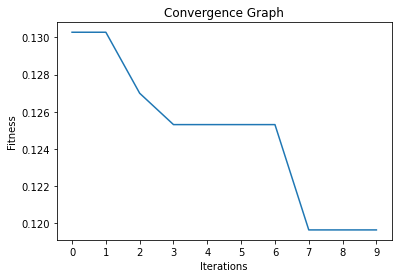

In [37]:
task_linear.plot_convergence()

In [38]:
rbf_conv_iterate = convergence_data[0]
rbf_conv = convergence_data[1]
poly_conv_iterate = convergence_data_poly[0]
poly_conv = convergence_data_poly[1]
linear_conv_iterate = convergence_data_linear[0]
linear_conv = convergence_data_linear[1]

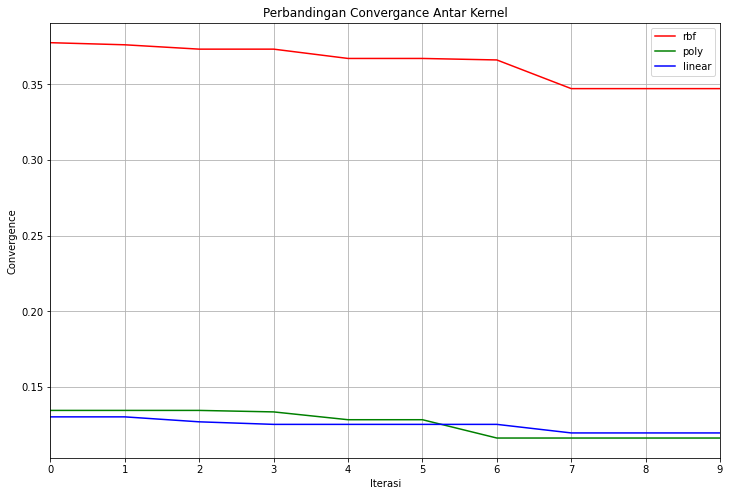

In [40]:
plt.figure(figsize=(12,8))
plt.plot(rbf_conv_iterate, rbf_conv, color='red', label='rbf')
plt.plot(poly_conv_iterate, poly_conv, color='green', label='poly')
plt.plot(linear_conv_iterate,linear_conv, color='blue', label='linear' )
plt.title('Perbandingan Convergance Antar Kernel')
plt.xlim(rbf_conv_iterate[0],rbf_conv_iterate[-1])
plt.legend()
plt.grid()
plt.xlabel('Iterasi')
plt.ylabel('Convergence')
plt.savefig('hasilcode\komparasi_convergence.png', format='png', dpi=150)
plt.show()